In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE
from sklearn.decomposition import PCA


In [15]:
df= pd.read_csv("SeoulBikeData.txt",delimiter=';')
df




,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [16]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [17]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

## Removing Missing Values

In [18]:
for column in df.columns:
    if df[column].isnull().any():  
        mean_value = df[column].mean()  
        df[column] = df[column].fillna(mean_value) 
df.columns = df.columns.str.strip()

df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

# Initial Summary

In [19]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### Separating Numerical and Categorical Columns


In [21]:
numerical_columns = df.select_dtypes(include=[int, float]).columns
categorical_columns = df.select_dtypes(include=[object]).columns

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')
Categorical columns: Index(['Date', 'Seasons', 'Holiday', 'Functioning Day'], dtype='object')


# Box Plot to see Outliers

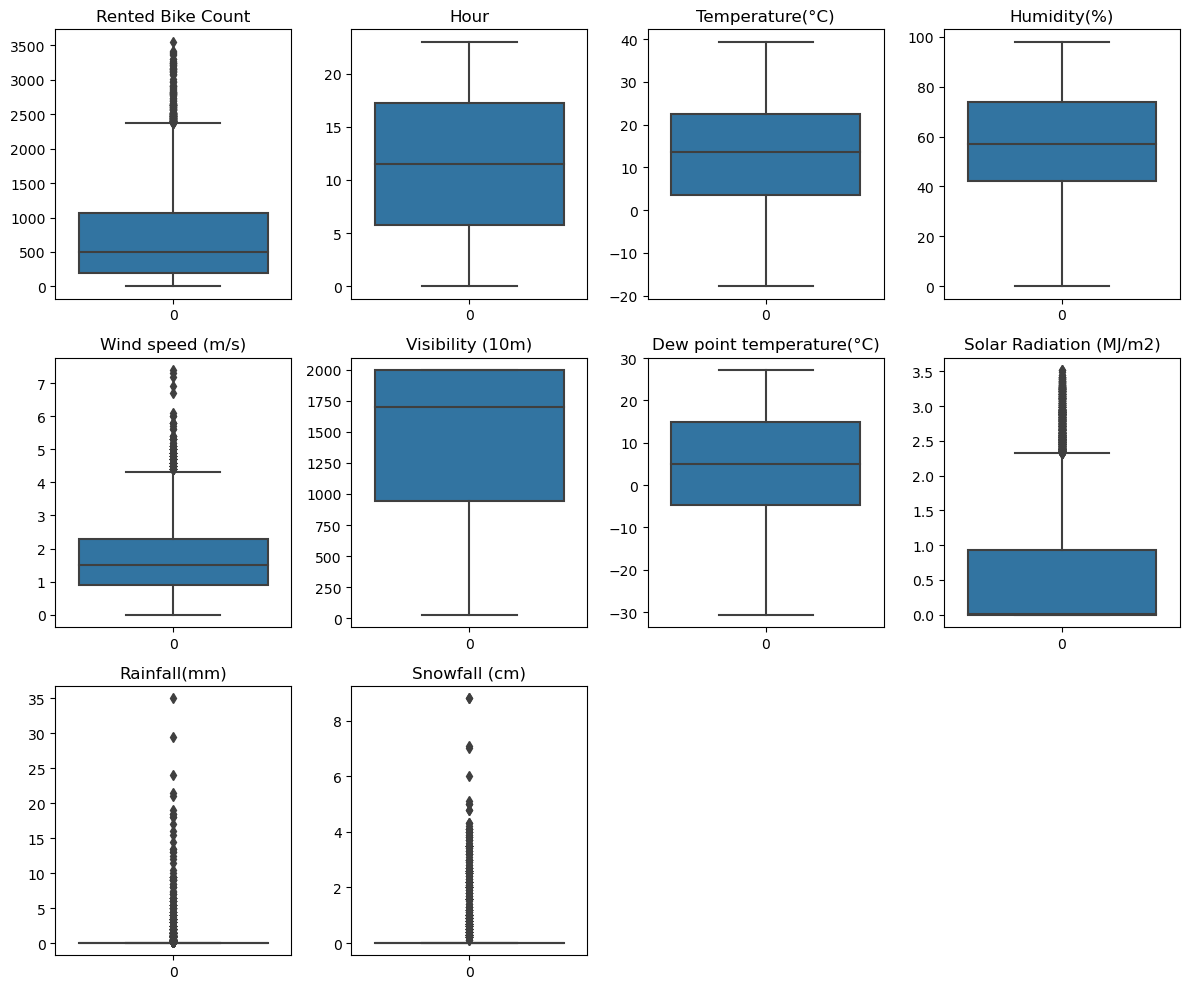

In [22]:
plt.figure(figsize=(12, 10))
num_plots = len(numerical_columns)
num_rows = (num_plots - 1) // 4 + 1  # Calculate the number of rows needed
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 4, i)  # Adjust the number of columns to 4
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


## Removing Outliers


In [23]:
def remove_outliers(df):
    for column in df.select_dtypes(include=['int', 'float']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from all numerical columns
df_cleaned = remove_outliers(df)



# With and Without Cross Validation

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

# Assuming 'Rented Bike Count' is your target column
X = df.drop(columns=['Rented Bike Count'])

# Exclude non-numeric columns
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_numeric = X[numeric_columns]

y = df['Rented Bike Count']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Without cross-validation
print("Without Cross-Validation:")
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initializing the KNN regressor
k = 5  # You can change the value of k
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# Fitting the model
knn_regressor.fit(X_train, y_train)

# Making predictions
y_pred = knn_regressor.predict(X_test)

# Calculating evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

# Calculating AIC using statsmodels
X_train_with_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_with_const)
results = model.fit()
aic_val = results.aic
bic_val = results.bic
p_values = results.pvalues

# Printing evaluation metrics
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r_squared)
print("AIC:", aic_val)
print("BIC:", bic_val)
print("P-Values:")
print(p_values)
print()

# With cross-validation
print("With Cross-Validation:")
# Initializing the KNN regressor
knn_regressor_cv = KNeighborsRegressor(n_neighbors=k)

# Initializing KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculating evaluation metrics using cross-validation
mae_scores = cross_val_score(knn_regressor_cv, X_scaled, y, cv=kf, scoring='neg_mean_absolute_error')
mse_scores = cross_val_score(knn_regressor_cv, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)
r2_scores = cross_val_score(knn_regressor_cv, X_scaled, y, cv=kf, scoring='r2')

# Printing evaluation metrics
print("MAE:", abs(mae_scores.mean()))
print("MSE:", abs(mse_scores.mean()))
print("RMSE:", rmse_scores.mean())
print("R-Squared:", r2_scores.mean())


Without Cross-Validation:
MAE: 230.3777397260274
MSE: 142277.58025114154
RMSE: 377.19700456279014
R-Squared: 0.6585170646597676
AIC: 106104.0435167556
BIC: 106172.59159308176
P-Values:
const     0.000000e+00
x1       3.277408e-209
x2        8.775410e-10
x3        6.680611e-12
x4        3.092683e-01
x5        3.911838e-02
x6        2.722317e-01
x7        3.227923e-18
x8        1.926230e-28
x9        1.277768e-01
dtype: float64

With Cross-Validation:
MAE: 229.91742009132417
MSE: 133864.4511643836
RMSE: 365.709509834746
R-Squared: 0.6781852556799297


# With RFE (Recursive Feature Elimination)

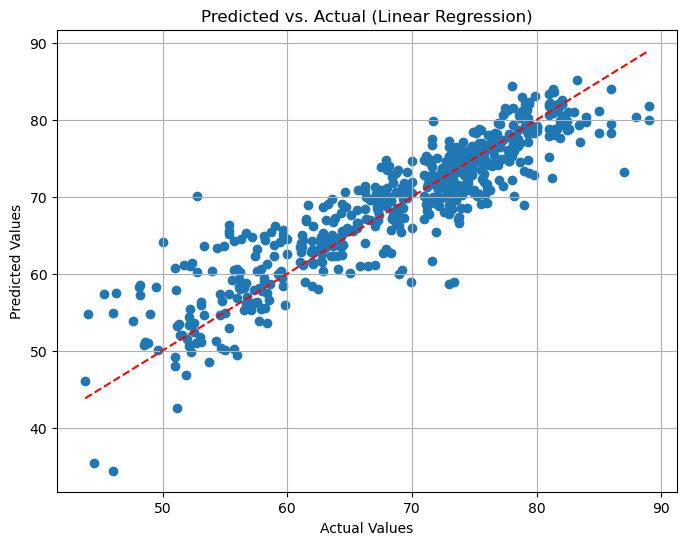

Linear Regression Results:
R-squared: 0.8226947795445846
Mean Squared Error: 15.360886871284777
Mean Absolute Error: 2.8612471374316026
Root Mean Squared Error (RMSE): 3.919296731721748




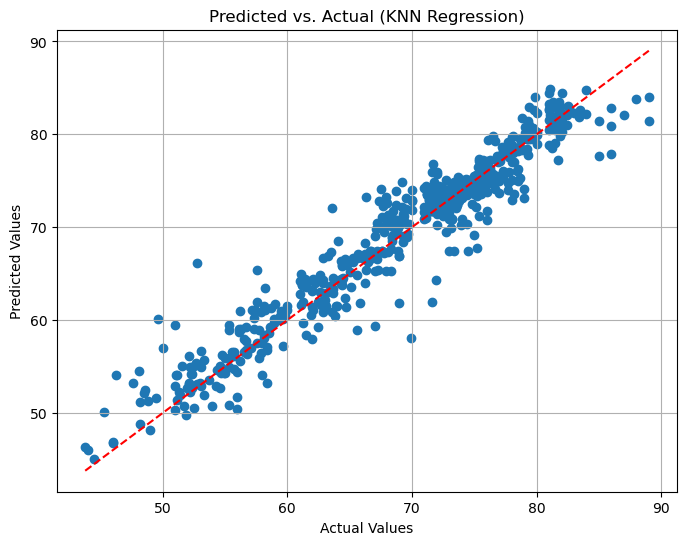

KNN Regression Results:
R-squared: 0.9236713647735508
Mean Squared Error: 6.612752448808324
Mean Absolute Error: 1.8022790974313216
Root Mean Squared Error (RMSE): 2.5715272599776817




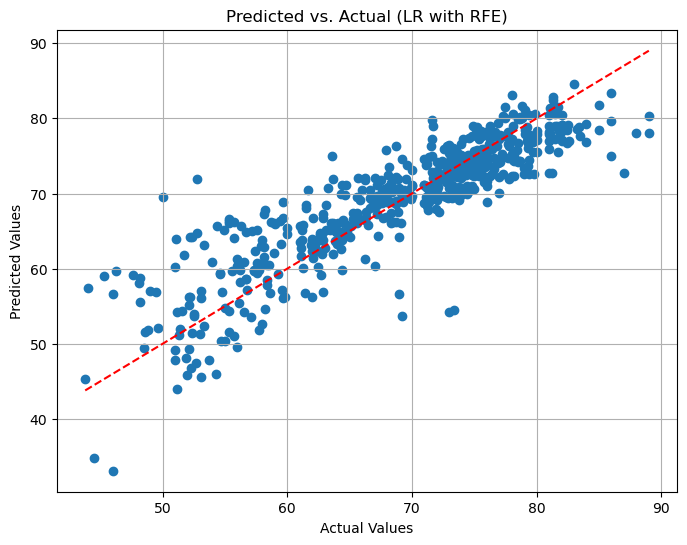

Linear Regression with RFE Results:
R-squared: 0.7661755777523046
Mean Squared Error: 20.25744356914489
Mean Absolute Error: 3.251137453505833
Root Mean Squared Error (RMSE): 4.500826987248553




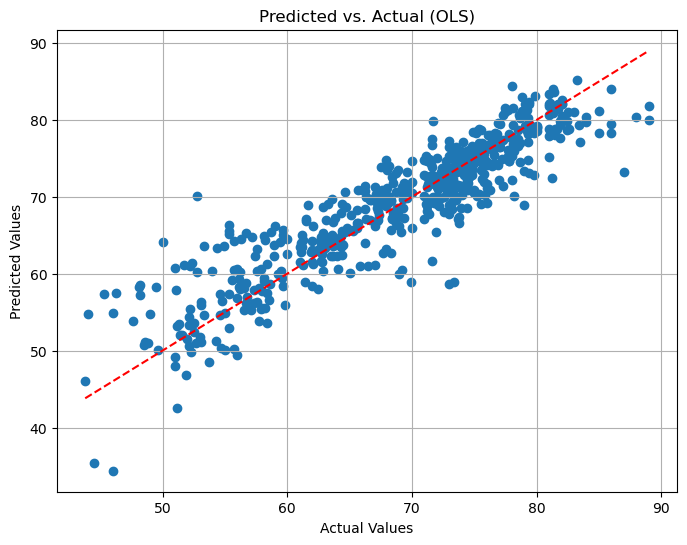


######################### OLS ###################
                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     543.5
Date:                Sat, 30 Mar 2024   Prob (F-statistic):               0.00
Time:                        07:58:12   Log-Likelihood:                -6650.0
No. Observations:                2350   AIC:                         1.334e+04
Df Residuals:                    2330   BIC:                         1.346e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Assuming 'life_expectancy' is your target column
X = df.drop(columns=['Rented Bike Count'])

# Exclude non-numeric columns
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_numeric = X[numeric_columns]

y = df['Rented Bike Count']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Plotting Predicted vs. Actual for LR model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (Linear Regression)")
plt.grid(True)
plt.show()

# Print Linear Regression results
print("Linear Regression Results:")
print("R-squared:", r2_score(y_test, lr_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, lr_predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, lr_predictions))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, lr_predictions)))
print("\n")

# KNN Regression model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Plotting Predicted vs. Actual for KNN model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, knn_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (KNN Regression)")
plt.grid(True)
plt.show()

# Print KNN Regression results
print("KNN Regression Results:")
print("R-squared:", r2_score(y_test, knn_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, knn_predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, knn_predictions))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, knn_predictions)))
print("\n")

# Linear Regression with RFE (Recursive Feature Elimination)
lr_model_rfe = LinearRegression()
rfe = RFE(estimator=lr_model_rfe, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)
selected_feature_indices = rfe.support_
X_train_rfe = X_train[:, selected_feature_indices]
X_test_rfe = X_test[:, selected_feature_indices]
lr_model_rfe.fit(X_train_rfe, y_train)
lr_predictions_rfe = lr_model_rfe.predict(X_test_rfe)

# Plotting Predicted vs. Actual for LR with RFE
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_predictions_rfe)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (LR with RFE)")
plt.grid(True)
plt.show()

# Print LR with RFE results
print("Linear Regression with RFE Results:")
print("R-squared:", r2_score(y_test, lr_predictions_rfe))
print("Mean Squared Error:", mean_squared_error(y_test, lr_predictions_rfe))
print("Mean Absolute Error:", mean_absolute_error(y_test, lr_predictions_rfe))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, lr_predictions_rfe)))
print("\n")

# OLS (Ordinary Least Squares) Regression
X_train_ols = sm.add_constant(X_train)
X_test_ols = sm.add_constant(X_test)
ols_model = sm.OLS(y_train, X_train_ols).fit()
y_pred_ols = ols_model.predict(X_test_ols)

# Plotting Predicted vs. Actual for OLS model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ols)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (OLS)")
plt.grid(True)
plt.show()

# Printing OLS summary
print("\n######################### OLS ###################")
print(ols_model.summary())

# Evaluate OLS Regression
r2_ols = r2_score(y_test, y_pred_ols)
mae = mean_absolute_error(y_test, y_pred_ols)
mse = mean_squared_error(y_test, y_pred_ols)
rmse = np.sqrt(mse)

print("\nOLS Results:")
print("R-squared (R2) Score:", r2_ols)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


# SUMMARY:
    


1) Evaluation Metrics:

* **R-squared**: Measures the proportion of variance in the dependent variable (life expectancy) explained by the independent variables. Higher values indicate a better fit.

* **Mean Squared Error (MSE)**: Average squared difference between predicted and actual values. Lower values are better.

* **Mean Absolute Error (MAE)**: Average absolute difference between predicted and actual values. Lower values are better.

* **Root Mean Squared Error (RMSE)**: Square root of MSE. Easier to interpret in the original units of the variable. Lower values are better.

2)  Key Observations:

* **KNN Regression**: Achieves the highest R-squared (0.9237) and lowest MSE (6.61), suggesting the best overall fit to the data.

* **Linear Regression**: Performs moderately well with an R-squared of 0.8227 and a moderate MSE.

* **Linear Regression with RFE**: Has a lower R-squared (0.7662) and higher MSE compared to the original Linear Regression, indicating that feature elimination might have removed some relevant features.

* **OLS Regression**: Provides detailed results like F-statistic, p-values, and coefficients for each feature. Its R-squared (0.816) is slightly lower than the base Linear Regression model.



# with Filter Method

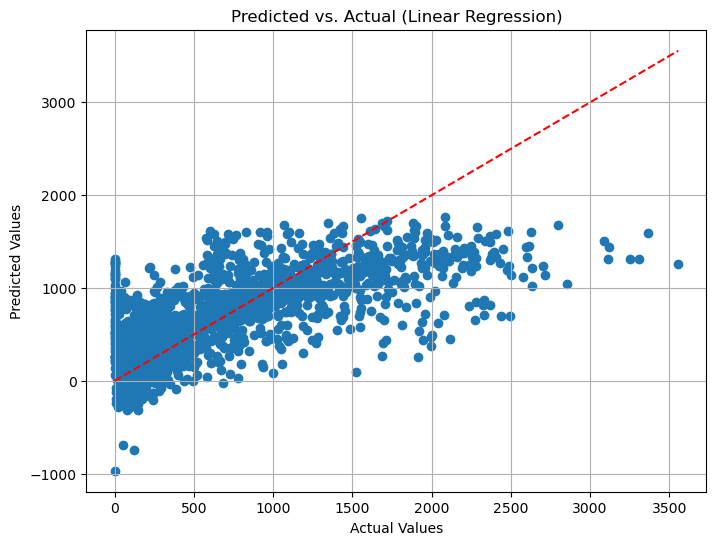

Linear Regression Results:
R-squared: 0.4650600364315155
Mean Squared Error: 222880.72322069775
Mean Absolute Error: 349.2802235949101
Root Mean Squared Error (RMSE): 472.1024499202453




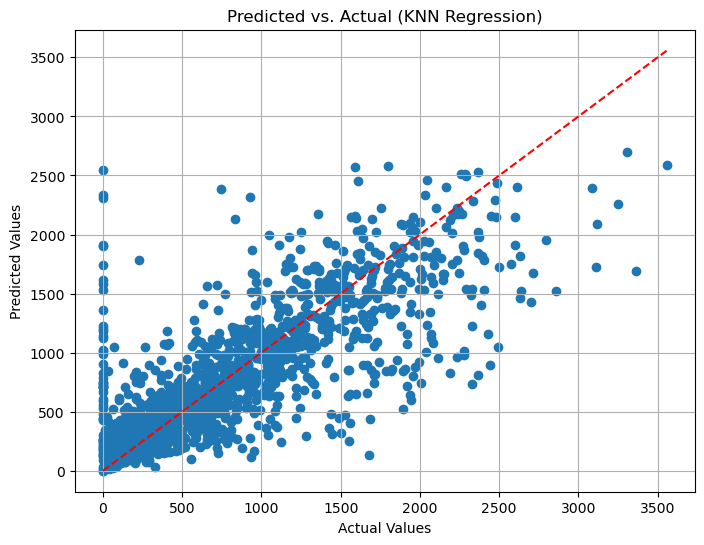

KNN Regression Results:
R-squared: 0.6585170646597676
Mean Squared Error: 142277.58025114154
Mean Absolute Error: 230.3777397260274
Root Mean Squared Error (RMSE): 377.19700456279014




ValueError: could not convert string to float: '1/12/2017'

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming 'life_expectancy' is your target column
X = df.drop(columns=['Rented Bike Count'])

# Exclude non-numeric columns
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_numeric = X[numeric_columns]

y = df['Rented Bike Count']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Plotting Predicted vs. Actual for LR model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (Linear Regression)")
plt.grid(True)
plt.show()

# Print Linear Regression results
print("Linear Regression Results:")
print("R-squared:", r2_score(y_test, lr_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, lr_predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, lr_predictions))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, lr_predictions)))
print("\n")

# KNN Regression model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Plotting Predicted vs. Actual for KNN model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, knn_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (KNN Regression)")
plt.grid(True)
plt.show()

# Print KNN Regression results
print("KNN Regression Results:")
print("R-squared:", r2_score(y_test, knn_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, knn_predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, knn_predictions))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, knn_predictions)))
print("\n")

# Filter Method (e.g., Correlation Coefficient)
corr_matrix = df.corr()
corr_with_target = corr_matrix['Rented Bike Count'].abs().sort_values(ascending=False)
top_features = corr_with_target[1:6].index  # Selecting top 5 features
X_filtered = X[top_features]

# Standardizing the filtered features
X_filtered_scaled = scaler.fit_transform(X_filtered)

# Splitting the filtered data into training and testing sets
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered_scaled, y, test_size=0.2, random_state=42)

# Linear Regression model with filtered features
lr_model_filtered = LinearRegression()
lr_model_filtered.fit(X_train_filtered, y_train_filtered)
lr_predictions_filtered = lr_model_filtered.predict(X_test_filtered)

# Plotting Predicted vs. Actual for LR model with filtered features
plt.figure(figsize=(8, 6))
plt.scatter(y_test_filtered, lr_predictions_filtered)
plt.plot([min(y_test_filtered), max(y_test_filtered)], [min(y_test_filtered), max(y_test_filtered)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (Linear Regression with Filtered Features)")
plt.grid(True)
plt.show()

# Print Linear Regression with filtered features results
print("Linear Regression with Filtered Features Results:")
print("R-squared:", r2_score(y_test_filtered, lr_predictions_filtered))
print("Mean Squared Error:", mean_squared_error(y_test_filtered, lr_predictions_filtered))
print("Mean Absolute Error:", mean_absolute_error(y_test_filtered, lr_predictions_filtered))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test_filtered, lr_predictions_filtered)))
print("\n")

# OLS (Ordinary Least Squares) Regression with filtered features
X_train_filtered_ols = sm.add_constant(X_train_filtered)
X_test_filtered_ols = sm.add_constant(X_test_filtered)
ols_model_filtered = sm.OLS(y_train_filtered, X_train_filtered_ols).fit()
y_pred_filtered_ols = ols_model_filtered.predict(X_test_filtered_ols)

# Plotting Predicted vs. Actual for OLS model with filtered features
plt.figure(figsize=(8, 6))
plt.scatter(y_test_filtered, y_pred_filtered_ols)
plt.plot([min(y_test_filtered), max(y_test_filtered)], [min(y_test_filtered), max(y_test_filtered)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (OLS with Filtered Features)")
plt.grid(True)
plt.show()

# Printing OLS summary for filtered features
print("\n######################### OLS with Filtered Features ###################")
print(ols_model_filtered.summary())

# Evaluate OLS Regression with filtered features
r2_ols_filtered = r2_score(y_test_filtered, y_pred_filtered_ols)
mae_filtered = mean_absolute_error(y_test_filtered, y_pred_filtered_ols)
mse_filtered = mean_squared_error(y_test_filtered, y_pred_filtered_ols)
rmse_filtered = np.sqrt(mse_filtered)

print("\nOLS Results with Filtered Features:")
print("R-squared (R2) Score:", r2_ols_filtered)
print("Mean Absolute Error (MAE):", mae_filtered)
print("Mean Squared Error (MSE):", mse_filtered)
print("Root Mean Squared Error (RMSE):", rmse_filtered)


# With PCA(Princopal Component Analysis)

Without Cross-Validation:


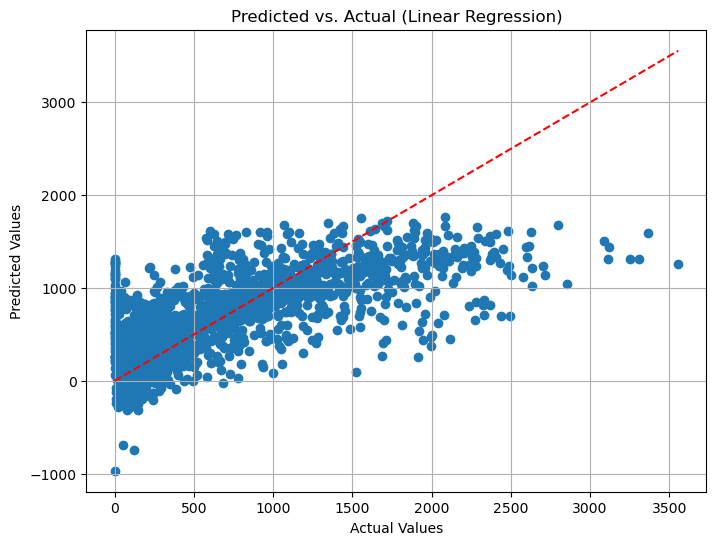

Linear Regression Results:
R-squared: 0.4650600364315155
Mean Squared Error: 222880.72322069775
Mean Absolute Error: 349.2802235949101
Root Mean Squared Error (RMSE): 472.1024499202453




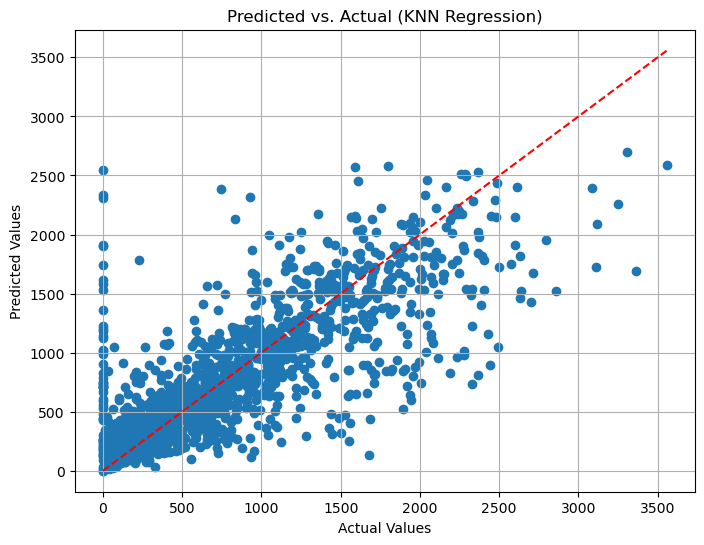

KNN Regression Results:
R-squared: 0.6585170646597676
Mean Squared Error: 142277.58025114154
Mean Absolute Error: 230.3777397260274
Root Mean Squared Error (RMSE): 377.19700456279014




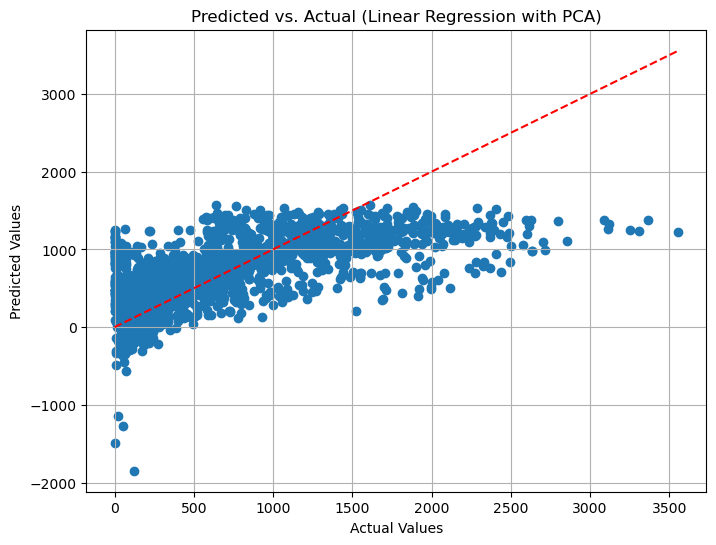

Linear Regression with PCA Results:
R-squared: 0.41790298160046857
Mean Squared Error: 242528.532697464
Mean Absolute Error: 362.36800865929354
Root Mean Squared Error (RMSE): 492.47185980263276




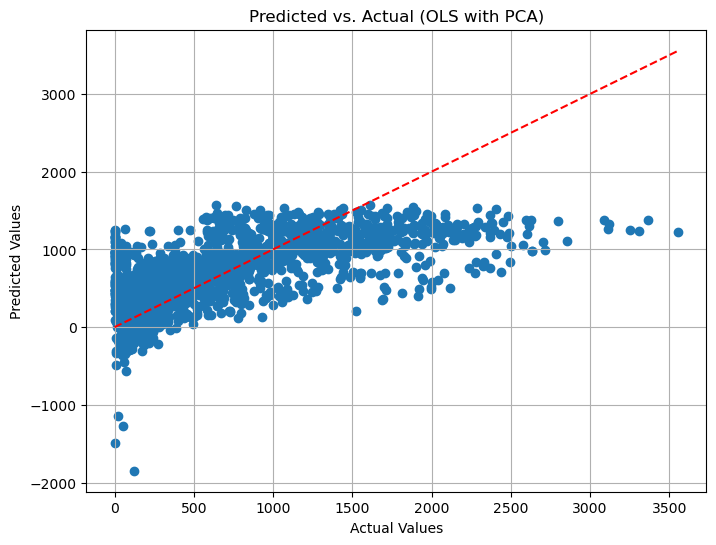


######################### OLS with PCA ###################
                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     1056.
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        01:32:23   Log-Likelihood:                -53310.
No. Observations:                7008   AIC:                         1.066e+05
Df Residuals:                    7002   BIC:                         1.067e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming 'life_expectancy' is your target column
X = df.drop(columns=['Rented Bike Count'])

# Exclude non-numeric columns
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_numeric = X[numeric_columns]

y = df['Rented Bike Count']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Without cross-validation
print("Without Cross-Validation:")
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Plotting Predicted vs. Actual for LR model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (Linear Regression)")
plt.grid(True)
plt.show()

# Print Linear Regression results
print("Linear Regression Results:")
print("R-squared:", r2_score(y_test, lr_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, lr_predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, lr_predictions))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, lr_predictions)))
print("\n")

# KNN Regression model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Plotting Predicted vs. Actual for KNN model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, knn_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (KNN Regression)")
plt.grid(True)
plt.show()

# Print KNN Regression results
print("KNN Regression Results:")
print("R-squared:", r2_score(y_test, knn_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, knn_predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, knn_predictions))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, knn_predictions)))
print("\n")

# PCA (Principal Component Analysis)
pca = PCA(n_components=5)  # Selecting 5 principal components
X_pca = pca.fit_transform(X_scaled)

# Splitting the PCA-transformed data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Linear Regression model with PCA
lr_model_pca = LinearRegression()
lr_model_pca.fit(X_train_pca, y_train_pca)
lr_predictions_pca = lr_model_pca.predict(X_test_pca)

# Plotting Predicted vs. Actual for LR model with PCA
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pca, lr_predictions_pca)
plt.plot([min(y_test_pca), max(y_test_pca)], [min(y_test_pca), max(y_test_pca)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (Linear Regression with PCA)")
plt.grid(True)
plt.show()

# Print Linear Regression with PCA results
print("Linear Regression with PCA Results:")
print("R-squared:", r2_score(y_test_pca, lr_predictions_pca))
print("Mean Squared Error:", mean_squared_error(y_test_pca, lr_predictions_pca))
print("Mean Absolute Error:", mean_absolute_error(y_test_pca, lr_predictions_pca))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test_pca, lr_predictions_pca)))
print("\n")

# OLS (Ordinary Least Squares) Regression with PCA
X_train_pca_ols = sm.add_constant(X_train_pca)
X_test_pca_ols = sm.add_constant(X_test_pca)
ols_model_pca = sm.OLS(y_train_pca, X_train_pca_ols).fit()
y_pred_pca_ols = ols_model_pca.predict(X_test_pca_ols)

# Plotting Predicted vs. Actual for OLS model with PCA
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pca, y_pred_pca_ols)
plt.plot([min(y_test_pca), max(y_test_pca)], [min(y_test_pca), max(y_test_pca)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (OLS with PCA)")
plt.grid(True)
plt.show()

# Printing OLS summary for PCA
print("\n######################### OLS with PCA ###################")
print(ols_model_pca.summary())

# Evaluate OLS Regression with PCA
r2_ols_pca = r2_score(y_test_pca, y_pred_pca_ols)
mae_pca = mean_absolute_error(y_test_pca, y_pred_pca_ols)
mse_pca = mean_squared_error(y_test_pca, y_pred_pca_ols)
rmse_pca = np.sqrt(mse_pca)

print("\nOLS Results with PCA:")
print("R-squared (R2) Score:", r2_ols_pca)
print("Mean Absolute Error (MAE):", mae_pca)
print("Mean Squared Error (MSE):", mse_pca)
print("Root Mean Squared Error (RMSE):", rmse_pca)


# SUMMARY:


1) Key Observations:

* KNN Regression performed best without PCA, achieving an R-squared of 0.6585 and the lowest MSE (142277).
* Linear Regression alone had a moderate R-squared (0.465) and a high MSE (222880).
* Linear Regression with PCA further reduced performance compared to the base model, with an R-squared of 0.4179 and even higher MSE (242528).

2) Detailed Look at OLS with PCA:
The provided table shows the detailed results of an OLS regression model using components extracted from PCA. The R-squared (0.43) is slightly better than the basic Linear Regression with PCA, but still lower than the models without PCA.

* Overall:

1) Using PCA in this case seems to have negatively impacted the performance of the regression model for predicting rented bike counts. This could be due to:
2) Loss of Information: PCA might have discarded important information from the original features during dimensionality reduction.
3) Choice of Components: The number of components chosen for the PCA might not have been optimal for capturing the relevant variation in the data.